In [11]:
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.src.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')


In [5]:
data = pd.read_csv("datasets/crop_data.csv")

X = data[["N", "P", "K", "temperature", "humidity", "ph"]]
y = data["label"]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

y_categorical = to_categorical(y_encoded)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42
)


model = Sequential()

model.add(Dense(256, input_dim=6, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(y_categorical.shape[1], activation="softmax"))


In [13]:
from keras.src.callbacks import EarlyStopping

optimizer = Adam(learning_rate=0.001)
model.compile(
    loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)

model.summary()
early_stopping = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 256)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 22)             │           726 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,670 (186.21 KB)

 Trainable params: 46,710 (182.46 KB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0866 - loss: 3.3425 - val_accuracy: 0.3773 - val_loss: 2.8429
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3040 - loss: 2.2882 - val_accuracy: 0.3977 - val_loss: 2.4582
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4303 - loss: 1.8358 - val_accuracy: 0.5023 - val_loss: 2.0410
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5294 - loss: 1.5286 - val_accuracy: 0.6295 - val_loss: 1.6001
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5961 - loss: 1.3249 - val_accuracy: 0.7159 - val_loss: 1.2158
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5838 - loss: 1.2240 - val_accuracy: 0.7750 - val_loss: 0.9436
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6606 - loss: 1.0586 - val_accuracy: 0.8273 - val_loss: 0.7326
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6718 - loss: 0.9895 - val_accuracy: 0.8477 - v

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.9344 - loss: 0.1597
Точность на тестовых данных: 93.18%


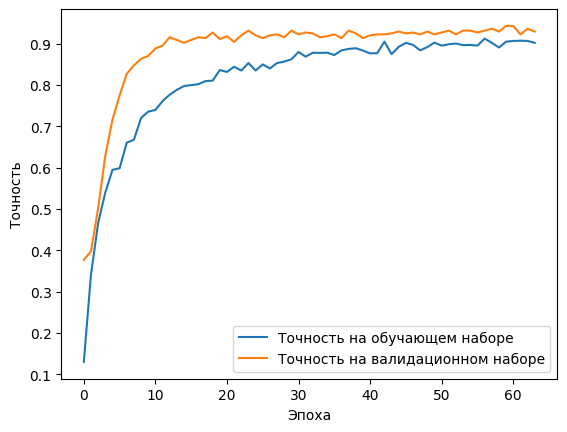

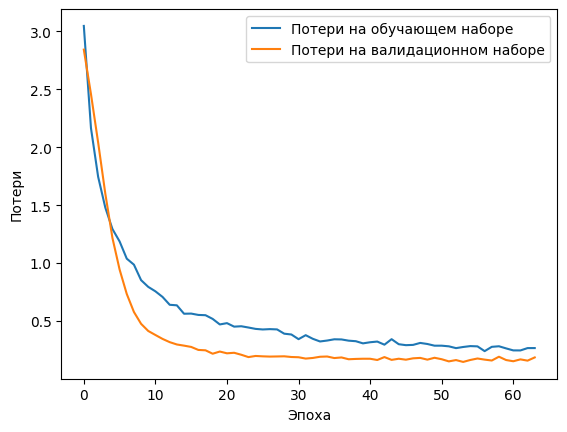

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Точность на тестовых данных: {test_accuracy * 100:.2f}%")

plt.plot(history.history["accuracy"], label="Точность на обучающем наборе")
plt.plot(history.history["val_accuracy"], label="Точность на валидационном наборе")
plt.xlabel("Эпоха")
plt.ylabel("Точность")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Потери на обучающем наборе")
plt.plot(history.history["val_loss"], label="Потери на валидационном наборе")
plt.xlabel("Эпоха")
plt.ylabel("Потери")
plt.legend()
plt.show()


In [16]:
model.save("crop.h5")


In [19]:
new_sample = np.array([[100, 40, 50, 25, 80, 6.0]]) 
print(new_sample)

new_sample_scaled = scaler.transform(new_sample)
print(new_sample_scaled)
prediction = model.predict(new_sample_scaled)
predicted_class = label_encoder.inverse_transform([np.argmax(prediction)])

print(f"Рекомендуемая культура для посева: {predicted_class[0]}")


[[100.  40.  50.  25.  80.   6.]]
[[ 1.33973445 -0.40519653  0.03655292 -0.12172483  0.38269087 -0.60675014]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Рекомендуемая культура для посева: jute
